In [159]:
# Importing necessary libraries.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout
import sklearn.metrics as metrics

In [160]:
# Importing the data from the file.
columns = ['timestamp','state','Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']
df_xlsx = pd.read_excel(r'Copy of Output.xlsx', header = None, names = columns)

<b> Data Preprocessing </b>

In [161]:
# Dropping the first row.
df_xlsx = df_xlsx.drop(df_xlsx.index[0])
df_xlsx

,timestamp,state,Ax,Ay,Az,Gx,Gy,Gz
1,0:00:00,0,0.873291,0.211182,-0.437866,2.408537,8.628049,-8.353659
2,0:00:02,0,0.872314,0.210815,-0.40625,2.896341,8.932927,-8.47561
3,0:00:02,0,0.872314,0.210205,-0.405273,3.567073,8.810976,-8.292683
4,0:00:02,0,0.873291,0.210449,-0.438232,-3.658537,8.810976,-8.170732
5,0:00:02,0,0.872559,0.210815,-0.438477,-3.109756,9.115854,-7.987805
...,...,...,...,...,...,...,...,...
107849,19:53:12,0,-0.936768,-0.288818,-0.092285,-8.810976,2.164634,-10.27439
107850,19:53:12,0,-0.937012,-0.288086,-0.092163,-4.085366,2.743902,-11.52439
107851,19:53:12,0,-0.971436,-0.286499,-0.091919,-17.042683,2.987805,-5.304878
107852,19:53:12,0,-0.97229,-0.286255,-0.09021,-14.481707,2.713415,-5.518293


In [162]:
# Dropping Null Values.
df_xlsx = df_xlsx.dropna()
df_xlsx.shape

(107853, 8)

In [163]:
# Dropping rows with the value of 'timestamp' equal to 0.
df = df_xlsx[df_xlsx['timestamp'] != 0]

In [164]:
# Arranging the data in ascending order of 'timestamp'.
df = df.sort_values(by = ['timestamp'], ignore_index=True)

<b> Declaring important parameters </b>

In [165]:
# Declaring important variables/ parameters.
random_seed = 42   
n_time_steps = 50 
n_features = 6
step = 10 
n_classes = 6 
n_epochs =  250     
batch_size = 1024   
learning_rate = 0.0025
l2_loss = 0.0015

In [166]:
# Creating segments.
segments = []
labels = []

for i in range(0,  df.shape[0]- n_time_steps, step):  

    ax = df['Ax'].values[i: i + 50]

    ay = df['Ay'].values[i: i + 50]

    az = df['Az'].values[i: i + 50]
    
    gx = df['Gx'].values[i: i + 50]
    
    gy = df['Gy'].values[i: i + 50]
    
    gz = df['Gz'].values[i: i + 50]

    segments.append([ax, ay, az, gx, gy, gz])
    
    label = stats.mode(df['state'][i: i + 50])[0][0]
    
    labels.append(label)

#reshape the segments which is (list of arrays) to a list
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, n_time_steps, n_features)

labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [167]:
# Returning segments shape.
reshaped_segments.shape

(10781, 50, 6)

<b> Designing and training the Sequential LSTM Model </b>

In [168]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = random_seed)

In [169]:
# Designing the Sequential model.
model = Sequential()

# The RNN layer. 
# Adding the LSTM layers.
model.add(LSTM(units = 128, input_shape = (X_train.shape[1], X_train.shape[2])))

# Th Dropout layer.
model.add(Dropout(0.5)) 

# Adding the Dense layer with the activation function set to 'relu'.
model.add(Dense(units = 64, activation='relu'))

# Adding the Softmax layer with the activation function set to 'softmax'.
model.add(Dense(y_train.shape[1], activation = 'softmax'))

# Compiling the Model.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [170]:
# Returning the Model summary.
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 128)               69120     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 130       
Total params: 77,506
Trainable params: 77,506
Non-trainable params: 0
_________________________________________________________________


In [171]:
# Fitting the Model.
history = model.fit(X_train, y_train, epochs = n_epochs, validation_split = 0.20, batch_size = batch_size, verbose = 1)

Epoch 1/250
7/7 [==============================] - 3s 336ms/step - loss: 0.8457 - accuracy: 0.4750 - val_loss: 0.4251 - val_accuracy: 0.8464
Epoch 2/250
7/7 [==============================] - 2s 293ms/step - loss: 0.4093 - accuracy: 0.8661 - val_loss: 0.4335 - val_accuracy: 0.8788
Epoch 3/250
7/7 [==============================] - 2s 305ms/step - loss: 0.3809 - accuracy: 0.8955 - val_loss: 0.3958 - val_accuracy: 0.8788
Epoch 4/250
7/7 [==============================] - 2s 297ms/step - loss: 0.3519 - accuracy: 0.8978 - val_loss: 0.3795 - val_accuracy: 0.8794
Epoch 5/250
7/7 [==============================] - 2s 299ms/step - loss: 0.3450 - accuracy: 0.8980 - val_loss: 0.3817 - val_accuracy: 0.8794
Epoch 6/250
7/7 [==============================] - 2s 298ms/step - loss: 0.3431 - accuracy: 0.8980 - val_loss: 0.3799 - val_accuracy: 0.8794
Epoch 7/250
7/7 [==============================] - 2s 300ms/step - loss: 0.3458 - accuracy: 0.8978 - val_loss: 0.3758 - val_accuracy: 0.8794
Epoch 8/250
7

Epoch 59/250
7/7 [==============================] - 2s 327ms/step - loss: 0.2255 - accuracy: 0.9135 - val_loss: 0.3821 - val_accuracy: 0.8713
Epoch 60/250
7/7 [==============================] - 2s 327ms/step - loss: 0.2193 - accuracy: 0.9143 - val_loss: 0.3974 - val_accuracy: 0.8672
Epoch 61/250
7/7 [==============================] - 2s 328ms/step - loss: 0.2118 - accuracy: 0.9174 - val_loss: 0.3989 - val_accuracy: 0.8614
Epoch 62/250
7/7 [==============================] - 2s 329ms/step - loss: 0.2167 - accuracy: 0.9146 - val_loss: 0.3919 - val_accuracy: 0.8736
Epoch 63/250
7/7 [==============================] - 2s 332ms/step - loss: 0.2163 - accuracy: 0.9140 - val_loss: 0.4039 - val_accuracy: 0.8632
Epoch 64/250
7/7 [==============================] - 2s 328ms/step - loss: 0.2117 - accuracy: 0.9187 - val_loss: 0.3990 - val_accuracy: 0.8626
Epoch 65/250
7/7 [==============================] - 2s 328ms/step - loss: 0.2117 - accuracy: 0.9219 - val_loss: 0.3949 - val_accuracy: 0.8632
Epoch 

7/7 [==============================] - 2s 349ms/step - loss: 0.0601 - accuracy: 0.9797 - val_loss: 0.8417 - val_accuracy: 0.8586
Epoch 117/250
7/7 [==============================] - 2s 338ms/step - loss: 0.0615 - accuracy: 0.9788 - val_loss: 0.8305 - val_accuracy: 0.8551
Epoch 118/250
7/7 [==============================] - 2s 337ms/step - loss: 0.0597 - accuracy: 0.9799 - val_loss: 0.8597 - val_accuracy: 0.8481
Epoch 119/250
7/7 [==============================] - 2s 328ms/step - loss: 0.0871 - accuracy: 0.9723 - val_loss: 0.8194 - val_accuracy: 0.8429
Epoch 120/250
7/7 [==============================] - 2s 337ms/step - loss: 0.0755 - accuracy: 0.9738 - val_loss: 0.7844 - val_accuracy: 0.8522
Epoch 121/250
7/7 [==============================] - 3s 377ms/step - loss: 0.0689 - accuracy: 0.9765 - val_loss: 0.7745 - val_accuracy: 0.8522
Epoch 122/250
7/7 [==============================] - 3s 411ms/step - loss: 0.0627 - accuracy: 0.9797 - val_loss: 0.8121 - val_accuracy: 0.8464
Epoch 123/250

7/7 [==============================] - 2s 338ms/step - loss: 0.0215 - accuracy: 0.9917 - val_loss: 1.2250 - val_accuracy: 0.8580
Epoch 174/250
7/7 [==============================] - 3s 376ms/step - loss: 0.0203 - accuracy: 0.9914 - val_loss: 1.2834 - val_accuracy: 0.8435
Epoch 175/250
7/7 [==============================] - 3s 359ms/step - loss: 0.0213 - accuracy: 0.9914 - val_loss: 1.2463 - val_accuracy: 0.8539
Epoch 176/250
7/7 [==============================] - 3s 371ms/step - loss: 0.0195 - accuracy: 0.9925 - val_loss: 1.3455 - val_accuracy: 0.8504
Epoch 177/250
7/7 [==============================] - 2s 351ms/step - loss: 0.0185 - accuracy: 0.9920 - val_loss: 1.3424 - val_accuracy: 0.8586
Epoch 178/250
7/7 [==============================] - 3s 368ms/step - loss: 0.0176 - accuracy: 0.9923 - val_loss: 1.3560 - val_accuracy: 0.8516
Epoch 179/250
7/7 [==============================] - 3s 390ms/step - loss: 0.0194 - accuracy: 0.9916 - val_loss: 1.4251 - val_accuracy: 0.8388
Epoch 180/250

7/7 [==============================] - 2s 337ms/step - loss: 0.0183 - accuracy: 0.9935 - val_loss: 1.2339 - val_accuracy: 0.8377
Epoch 231/250
7/7 [==============================] - 2s 345ms/step - loss: 0.0127 - accuracy: 0.9957 - val_loss: 1.2806 - val_accuracy: 0.8609
Epoch 232/250
7/7 [==============================] - 2s 338ms/step - loss: 0.0141 - accuracy: 0.9954 - val_loss: 1.2831 - val_accuracy: 0.8400
Epoch 233/250
7/7 [==============================] - 2s 353ms/step - loss: 0.0142 - accuracy: 0.9945 - val_loss: 1.2695 - val_accuracy: 0.8528
Epoch 234/250
7/7 [==============================] - 2s 343ms/step - loss: 0.0152 - accuracy: 0.9952 - val_loss: 1.3238 - val_accuracy: 0.8609
Epoch 235/250
7/7 [==============================] - 2s 341ms/step - loss: 0.0104 - accuracy: 0.9961 - val_loss: 1.3926 - val_accuracy: 0.8487
Epoch 236/250
7/7 [==============================] - 2s 339ms/step - loss: 0.0115 - accuracy: 0.9959 - val_loss: 1.3815 - val_accuracy: 0.8417
Epoch 237/250

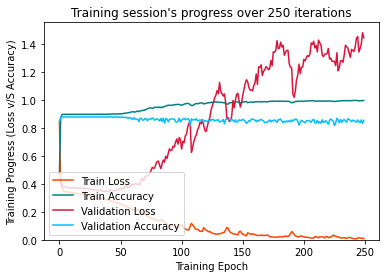

In [177]:
# Plotting the Training and Validation Loss and Accuracy.
plt.plot(np.array(history.history['loss']), "orangered", label = "Train Loss")
plt.plot(np.array(history.history['accuracy']), "teal", label = "Train Accuracy")
plt.plot(np.array(history.history['val_loss']), "crimson", label = "Validation Loss")
plt.plot(np.array(history.history['val_accuracy']), "deepskyblue", label = "Validation Accuracy")
plt.title("Training session's progress over 250 iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss v/S Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

In [178]:
# Returning the Test Accuracy and Loss.
loss, accuracy = model.evaluate(X_test, y_test, batch_size = batch_size, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

3/3 [==============================] - 0s 63ms/step - loss: 1.2364 - accuracy: 0.8836
Test Accuracy : 0.8836346864700317
Test Loss : 1.2364171743392944


<b> Finding the Correlation between the 'state' and 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz' attribute </b>

In [180]:
# Casting all columns to float.
df['state']=np.float64(df['state'])
df['Ax']=np.float64(df['Ax'])
df['Ay']=np.float64(df['Ax'])
df['Az']=np.float64(df['Ax'])
df['Gx']=np.float64(df['Ax'])
df['Gy']=np.float64(df['Ax'])
df['Gz']=np.float64(df['Ax'])
# print(df)

In [181]:
# Returning the correlation between state and rest of the attributes.
# By default Pearson's Coefficient is returned.
corr=df['state'].corr(df['Ax'])
print("Correlation between state and Ax: ", corr)

corr=df['state'].corr(df['Ay'])
print("Correlation between state and Ay: ", corr)

corr=df['state'].corr(df['Az'])
print("Correlation between state and Az: ", corr)

corr=df['state'].corr(df['Gx'])
print("Correlation between state and Gx: ", corr)

corr=df['state'].corr(df['Gy'])
print("Correlation between state and Gy: ", corr)

corr=df['state'].corr(df['Gz'])
print("Correlation between state and Gz: ", corr)

Correlation between state and Ax:  0.014697085905059066
Correlation between state and Ay:  0.014697085905059066
Correlation between state and Az:  0.014697085905059066
Correlation between state and Gx:  0.014697085905059066
Correlation between state and Gy:  0.014697085905059066
Correlation between state and Gz:  0.014697085905059066
